<a href="https://colab.research.google.com/github/SanjnaReddy27/Fall-2023-CS5720/blob/main/NN%26DeepLearning_ICP6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Use the use case in the class:
a. Add more Dense layers to the existing code and check how the accuracy changes.
2. Change the data source to Breast Cancer dataset * available in the source code folder and make required
changes. Report accuracy of the model.
3. Normalize the data before feeding the data to the model and check how the normalization change your
accuracy (code given below).
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
Breast Cancer dataset is designated to predict if a patient has Malignant (M) or Benign = B cancer

In [4]:
import keras
import pandas
from keras.models import Sequential
from keras.layers import Dense, Activation

# load dataset
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

dataset = pd.read_csv('/content/drive/MyDrive/diabetes.csv', header=None).values

X_train, X_test, Y_train, Y_test = train_test_split(dataset[:,0:8], dataset[:,8],
                                                    test_size=0.25, random_state=87)
np.random.seed(155)
my_first_nn = Sequential() # create model
my_first_nn.add(Dense(20, input_dim=8, activation='relu')) # hidden layer
my_first_nn.add(Dense(1, activation='sigmoid')) # output layer
my_first_nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])
my_first_nn_fitted = my_first_nn.fit(X_train, Y_train, epochs=100,
                                     initial_epoch=0)
print(my_first_nn.summary())
print(my_first_nn.evaluate(X_test, Y_test))

Epoch 1/100
18/18 [==============================] - 1s 5ms/step - loss: 21.6796 - acc: 0.6476
Epoch 2/100
18/18 [==============================] - 0s 5ms/step - loss: 13.8670 - acc: 0.5833
Epoch 3/100
18/18 [==============================] - 0s 4ms/step - loss: 9.4353 - acc: 0.5330
Epoch 4/100
18/18 [==============================] - 0s 5ms/step - loss: 6.1067 - acc: 0.5451
Epoch 5/100
18/18 [==============================] - 0s 4ms/step - loss: 3.6747 - acc: 0.5347
Epoch 6/100
18/18 [==============================] - 0s 4ms/step - loss: 2.4993 - acc: 0.5903
Epoch 7/100
18/18 [==============================] - 0s 5ms/step - loss: 2.1834 - acc: 0.6128
Epoch 8/100
18/18 [==============================] - 0s 5ms/step - loss: 1.9775 - acc: 0.6250
Epoch 9/100
18/18 [==============================] - 0s 4ms/step - loss: 1.8040 - acc: 0.6198
Epoch 10/100
18/18 [==============================] - 0s 4ms/step - loss: 1.6820 - acc: 0.6354
Epoch 11/100
18/18 [==============================] - 0s 

In [5]:
import keras
import pandas
from keras.models import Sequential
from keras.layers import Dense, Activation

# load dataset
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

dataset = pd.read_csv('/content/drive/MyDrive/diabetes.csv', header=None).values

X_train, X_test, Y_train, Y_test = train_test_split(dataset[:,0:8], dataset[:,8],
                                                    test_size=0.25, random_state=87)
np.random.seed(155)
my_first_nn = Sequential() # create model
my_first_nn.add(Dense(30, input_dim=8, activation='relu')) # hidden layer
my_first_nn.add(Dense(1, activation='sigmoid')) # output layer
my_first_nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])
my_first_nn_fitted = my_first_nn.fit(X_train, Y_train, epochs=100,
                                     initial_epoch=0)
print(my_first_nn.summary())
print(my_first_nn.evaluate(X_test, Y_test))

Epoch 1/100
18/18 [==============================] - 1s 2ms/step - loss: 4.1642 - acc: 0.4740
Epoch 2/100
18/18 [==============================] - 0s 2ms/step - loss: 2.5433 - acc: 0.5069
Epoch 3/100
18/18 [==============================] - 0s 2ms/step - loss: 2.0089 - acc: 0.4861
Epoch 4/100
18/18 [==============================] - 0s 4ms/step - loss: 1.6831 - acc: 0.5087
Epoch 5/100
18/18 [==============================] - 0s 5ms/step - loss: 1.5179 - acc: 0.5278
Epoch 6/100
18/18 [==============================] - 0s 7ms/step - loss: 1.3849 - acc: 0.5399
Epoch 7/100
18/18 [==============================] - 0s 9ms/step - loss: 1.3025 - acc: 0.5538
Epoch 8/100
18/18 [==============================] - 0s 4ms/step - loss: 1.1628 - acc: 0.5868
Epoch 9/100
18/18 [==============================] - 0s 4ms/step - loss: 1.0620 - acc: 0.5781
Epoch 10/100
18/18 [==============================] - 0s 10ms/step - loss: 1.0231 - acc: 0.5920
Epoch 11/100
18/18 [==============================] - 0s 9

Use Image Classification on the hand written digits data set (mnist)
1. Plot the loss and accuracy for both training data and validation data using the history object in the source
code.
2. Plot one of the images in the test data, and then do inferencing to check what is the prediction of the model
on that single image.
3. We had used 2 hidden layers and Relu activation. Try to change the number of hidden layer and the
activation to tanh or sigmoid and see what happens.
4. Run the same code without scaling the images and check the performance?

In [15]:
from keras import Sequential
from keras.datasets import mnist
import numpy as np
from keras.layers import Dense
from keras.utils import to_categorical

(train_images,train_labels),(test_images, test_labels) = mnist.load_data()

print(train_images.shape[1:])
#process the data
#1. convert each image of shape 28*28 to 784 dimensional which will be fed to the network as a single feature
dimData = np.prod(train_images.shape[1:])
print(dimData)
train_data = train_images.reshape(train_images.shape[0],dimData)
test_data = test_images.reshape(test_images.shape[0],dimData)

#convert data to float and scale values between 0 and 1
train_data = train_data.astype('float')
test_data = test_data.astype('float')
#scale data
train_data /=255.0
test_data /=255.0
#change the labels frominteger to one-hot encoding. to_categorical is doing the same thing as LabelEncoder()
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

#creating network
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(dimData,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_data, train_labels_one_hot, batch_size=256, epochs=10, verbose=1,
                   validation_data=(test_data, test_labels_one_hot))

11490434/11490434 [==============================] - 0s 0us/step
(28, 28)
784
Epoch 1/10
235/235 [==============================] - 7s 27ms/step - loss: 0.2932 - accuracy: 0.9103 - val_loss: 0.1795 - val_accuracy: 0.9417
Epoch 2/10
235/235 [==============================] - 8s 34ms/step - loss: 0.0994 - accuracy: 0.9692 - val_loss: 0.0943 - val_accuracy: 0.9702
Epoch 3/10
235/235 [==============================] - 6s 26ms/step - loss: 0.0638 - accuracy: 0.9803 - val_loss: 0.0831 - val_accuracy: 0.9759
Epoch 4/10
235/235 [==============================] - 7s 31ms/step - loss: 0.0435 - accuracy: 0.9865 - val_loss: 0.0643 - val_accuracy: 0.9805
Epoch 5/10
235/235 [==============================] - 7s 28ms/step - loss: 0.0317 - accuracy: 0.9904 - val_loss: 0.0638 - val_accuracy: 0.9806
Epoch 6/10
235/235 [==============================] - 6s 27ms/step - loss: 0.0234 - accuracy: 0.9931 - val_loss: 0.0707 - val_accuracy: 0.9793
Epoch 7/10
235/235 [==============================] - 8s 32ms/st

In [19]:
from keras import Sequential
from keras.datasets import mnist
import numpy as np
from keras.layers import Dense
from keras.utils import to_categorical

(train_images,train_labels),(test_images, test_labels) = mnist.load_data()

print(train_images.shape[1:])
#process the data
#1. convert each image of shape 28*28 to 784 dimensional which will be fed to the network as a single feature
dimData = np.prod(train_images.shape[1:])
print(dimData)
train_data = train_images.reshape(train_images.shape[0],dimData)
test_data = test_images.reshape(test_images.shape[0],dimData)

#convert data to float and scale values between 0 and 1
train_data = train_data.astype('float')
test_data = test_data.astype('float')
#scale data
train_data /=255.0
test_data /=255.0
#change the labels frominteger to one-hot encoding. to_categorical is doing the same thing as LabelEncoder()
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

#creating network
model = Sequential()
model.add(Dense(500, activation='relu', input_shape=(dimData,)))
model.add(Dense(500, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_data, train_labels_one_hot, batch_size=256, epochs=10, verbose=1,
                   validation_data=(test_data, test_labels_one_hot))

(28, 28)
784
Epoch 1/10
235/235 [==============================] - 9s 36ms/step - loss: 0.2913 - accuracy: 0.9111 - val_loss: 0.1877 - val_accuracy: 0.9389
Epoch 2/10
235/235 [==============================] - 6s 26ms/step - loss: 0.0989 - accuracy: 0.9693 - val_loss: 0.0841 - val_accuracy: 0.9733
Epoch 3/10
235/235 [==============================] - 8s 34ms/step - loss: 0.0626 - accuracy: 0.9803 - val_loss: 0.0759 - val_accuracy: 0.9749
Epoch 4/10
235/235 [==============================] - 6s 26ms/step - loss: 0.0434 - accuracy: 0.9859 - val_loss: 0.0760 - val_accuracy: 0.9773
Epoch 5/10
235/235 [==============================] - 8s 35ms/step - loss: 0.0325 - accuracy: 0.9900 - val_loss: 0.0587 - val_accuracy: 0.9822
Epoch 6/10
235/235 [==============================] - 7s 28ms/step - loss: 0.0228 - accuracy: 0.9928 - val_loss: 0.0735 - val_accuracy: 0.9792
Epoch 7/10
235/235 [==============================] - 8s 33ms/step - loss: 0.0177 - accuracy: 0.9943 - val_loss: 0.0762 - val_acc

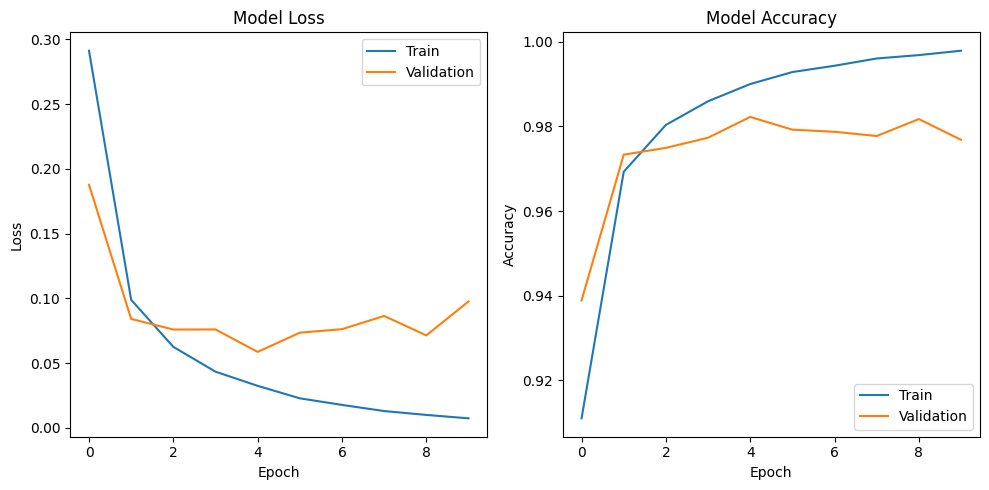

In [20]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='lower right')

plt.tight_layout()
plt.show()
